# Transport
# conditions de travail

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("Cleaned SST en agriculture Final2 (2).xlsx - Sheet1.csv")

In [ ]:
data.shape

(223, 65)

In [ ]:
data[['TAS', 'TAD', 'GAD']].dropna()

,TAS,TAD,GAD
0,120.0,80.0,"0,73"
1,120.0,80.0,"0,96"
2,150.0,80.0,"0,93"
3,120.0,70.0,"1,12"
4,130.0,80.0,"0,99"
...,...,...,...
75,150.0,80.0,"0,92"
76,120.0,70.0,"0,94"
77,120.0,70.0,"0,8"
78,160.0,90.0,"1,08"


In [ ]:
data.columns

Index(['N°', 'Date de la visite', 'Nom', 'Prénom', 'N° du téléphone',
       'Date de naissance', 'Age', 'Situation maritale', 'Nb enfants',
       'Nb pers à charge', 'Profession du mari', 'Domicile',
       'Niveau socio-économique', 'Tabagisme', 'Neffa', 'Fumées de Tabouna',
       'Antécédents familiaux', 'q', 'Antécédent personnels: chirurgicaux',
       'AT en milieu agricole', 'H travail / jour', 'Mécanisme AT',
       'Ménopause', 'Age ménopause', 'Antécédents gynéco',
       'Ancienneté agricole', 'Produits chimiques utilisés',
       'Troubles gynécologiques', 'Professions antérieures',
       'Catégorie professionnelle', 'Statut', 'Tâches effectuées',
       'Contraintes physiques', 'Engrais utilisés',
       'Produits biologiques utilisés', 'Contraintes thermiques',
       'J travail / Sem', 'Masque pour pesticides', 'Bottes',
       'Niveau scolaire', 'Gants', 'Casquette/Mdhalla', 'Manteau imperméable',
       'Moyen de transport', 'Troubles cardio-respiratoires',
       '

In [ ]:
data[['Tabagisme','q']].loc[data["Tabagisme"]=="non"].dropna().head(10)



,Tabagisme,q
0,non,cardiopathie
1,non,"hta, cardiopathie"
2,non,aucun
3,non,infections génitales
4,non,"asthme allergique, varices"
6,non,gonarthrose - lombosciatique gauche
7,non,aucun
8,non,rhumatisme
9,non,aucun
10,non,ncb


In [ ]:
newAges  = data["Age"].loc[(data["Age"]!='non spécifié')&(data["Age"]!='#VALUE!')].dropna()

In [ ]:
newAges =newAges.astype(int)

<Axes: xlabel='Age', ylabel='count'>

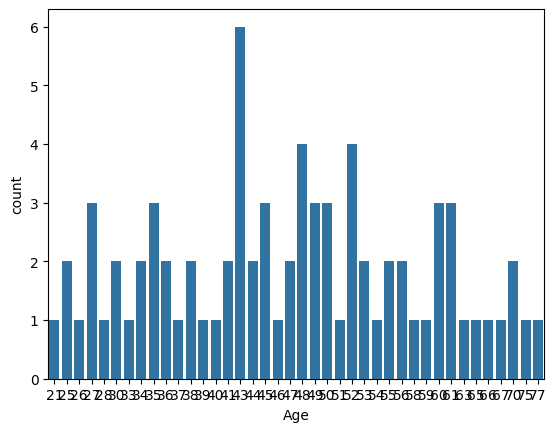

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=newAges.value_counts().index,y=newAges.value_counts())
plt.xticks(rotation=45)

# Transportation

In [ ]:
data = data.reset_index()

In [ ]:
age = data[["index","Age"]].loc[(data["Age"]!='non spécifié')&(data["Age"]!='#VALUE!')].dropna()

In [ ]:
age

,index,Age
0,0,60
2,2,60
3,3,48
4,4,43
5,5,50
...,...,...
75,75,46
76,76,49
77,77,27
78,78,65


In [ ]:
niveau_scholar = data[["index","Niveau scolaire"]].loc[data["Niveau scolaire"]!="non spécifié"].dropna()

In [ ]:
niveau_scholar

,index,Niveau scolaire
0,0,analphabète
1,1,primaire
2,2,primaire
3,3,primaire
4,4,secondaire
...,...,...
75,75,primaire
76,76,primaire
77,77,secondaire
78,78,analphabète


In [ ]:
Education = pd.merge(age,niveau_scholar,on="index")

In [ ]:
Education["Age"] = Education["Age"].astype(int)

In [ ]:
grouped_Education = Education.groupby("Niveau scolaire").mean().reset_index()

<Axes: xlabel='Niveau scolaire', ylabel='Age'>

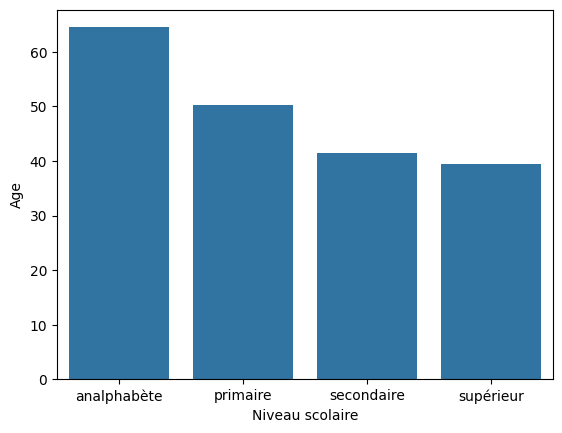

In [ ]:
sns.barplot(x=grouped_Education["Niveau scolaire"],y=grouped_Education["Age"])

# Transportation

In [ ]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7e36cbe32cd0>,
 [Text(-0.5625790964702851, 0.9452538072997525, 'a pieds'),
  Text(-0.10917901340249887, -1.0945683820723386, 'camion non protégé'),
  Text(0.5625791628460702, -0.9452537677954079, 'hybride'),
  Text(0.9100345187347304, -0.6179297490097461, 'charette'),
  Text(1.0448021924835644, -0.344076123236613, 'voiture'),
  Text(1.0783271341850258, -0.2172799845367945, 'charrette'),
  Text(1.0921812998319367, -0.1309198544813636, 'bus / transport public'),
  Text(1.0991303433039474, -0.04373200691195019, 'bus / transport public, camion non protégé')],
 [Text(-0.3068613253474282, 0.515592985799865, '67%'),
  Text(-0.05955218912863574, -0.5970372993121846, '13%'),
  Text(0.3068613615524019, -0.5155929642520406, '8%'),
  Text(0.4963824647643983, -0.33705259036895235, '6%'),
  Text(0.5698921049910352, -0.1876778854017889, '3%'),
  Text(0.5881784368281958, -0.11851635520188789, '1%'),
  Text(0.5957352544537836, -0.07141082971710741, '1%'),
  Text(0.59952

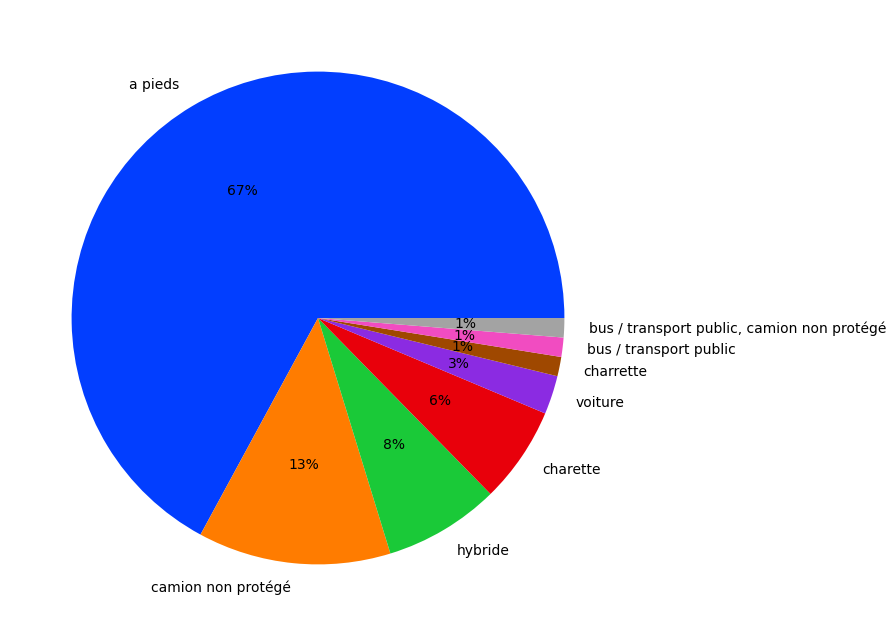

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

transport = data.loc[data["Moyen de transport"].ne("non spécifié") & data["Moyen de transport"].notna(), "Moyen de transport"] # filtre
transport = transport.apply(lambda x: "hybride" if len(x.split(","))>1 and (x.split(",")[0]=="a pieds") else x)
transport = transport.value_counts()
keys = transport.index
y = transport.values

palette_color = sns.color_palette('bright')

# plotting data on chart
ax.pie(y, labels=keys, colors=palette_color, autopct='%.0f%%')

# Health

In [ ]:
cols = ["Age","Examen abdominal","Examen buccodentaire","Examen tête et cou","Examen des membres supérieurs","Examen des téguments","Examen visuel"]

healthdataset = data[cols].reset_index()

Health = pd.DataFrame()

for col in cols[1:]:
    temp = healthdataset[["Age",col]].dropna().loc[healthdataset[col].dropna().ne("non spécifié")]
    temp.columns = ["Age","maladie"]
    Health = pd.concat([Health,temp])



In [ ]:
Health = Health.loc[(Health["Age"]!="non spécifié")& (Health["Age"]!="#VALUE!")]

In [ ]:
Health["Age"] = Health["Age"].apply(lambda age: "jeune" if int(age) < 40 else ("adulte" if int(age) < 60 else "vieille"))

<ipython-input-72-9891a4a18249>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Health["Age"] = Health["Age"].apply(lambda age: "jeune" if int(age) < 40 else ("adulte" if int(age) < 60 else "vieille"))


In [ ]:
Health

,Age,maladie
8,adulte,sensibilité épigastrique
10,adulte,sensibilité épigastrique
42,adulte,trouble du transit
45,jeune,sensibilité épigastrique
49,adulte,epigastralgies
56,adulte,colopathie fonctionnelle
69,jeune,douleur à l'ébranlement lombaire
18,adulte,tuméfaction sublinguale
43,adulte,cassure dentaire
46,vieille,avulsions dentaires


In [ ]:
groupedData = Health.groupby(["Age","maladie"]).size().reset_index(name="count")

adult = groupedData.loc[groupedData["Age"]=="adulte"]
jeun = groupedData.loc[groupedData["Age"]=="jeune"]
vieill = groupedData.loc[groupedData["Age"]=="vieille"]

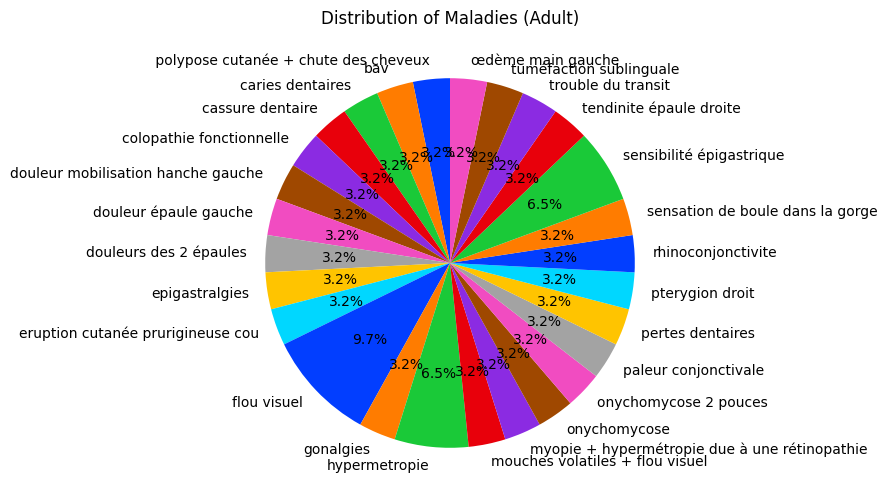

In [ ]:
def create_pie_chart(data, title):
    palette_color = sns.color_palette('bright')
    plt.figure(figsize=(6, 6))
    plt.pie(data["count"], labels=data["maladie"], autopct="%1.1f%%", startangle=90, colors=palette_color)
    plt.title(title)
    plt.show()
# Create pie charts for each age group
create_pie_chart(adult, "Distribution of Maladies (Adult)")

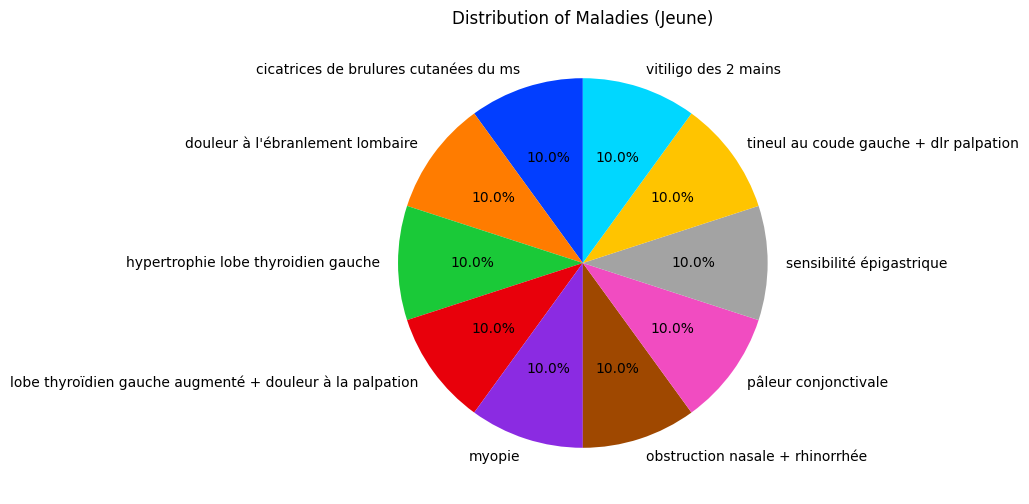

In [ ]:
create_pie_chart(jeun, "Distribution of Maladies (Jeune)")

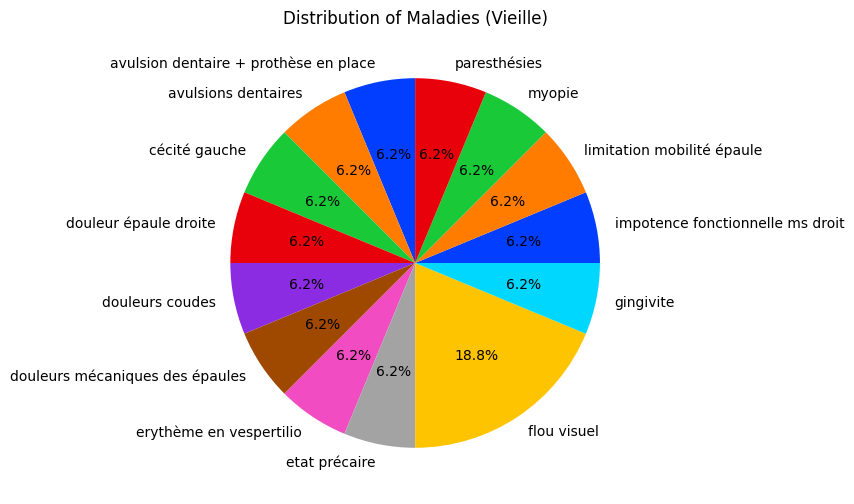

In [ ]:
create_pie_chart(vieill, "Distribution of Maladies (Vieille)")

In [ ]:
data["Contraintes physiques"].loc[data["Contraintes physiques"]!="non spécifié"].value_counts()

,count
Contraintes physiques,
"contraintes biomécaniques et posturales, contraintes mécaniques (risque d'at)",43
contraintes biomécaniques et posturales,27
"contraintes biomécaniques et posturales, contraintes mécaniques (risque d'at), vibrations, bruits (machines, engins)",2
"contraintes biomécaniques et posturales, vibrations",1
"contraintes biomécaniques et posturales, contraintes mécaniques (risque d'at), bruits (machines, engins)",1


# life situation

Text(0.5, 1.0, 'Distribution of number of children')

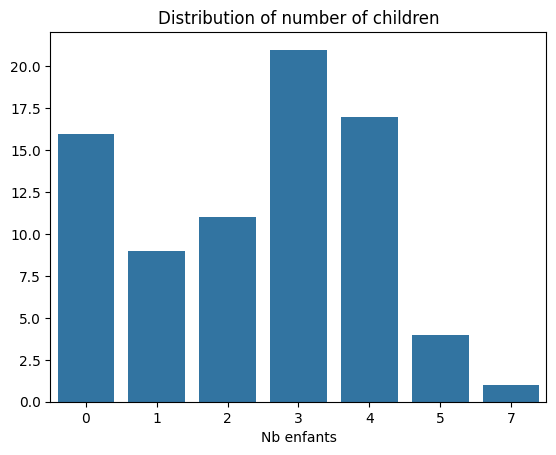

In [ ]:
nbEnfant = data["Nb enfants"].dropna().loc[(data["Nb enfants"].dropna()!="non spécifié")&(data["Nb enfants"].dropna()!='2,392405063') ].astype(int).value_counts()

x = nbEnfant.index
y = nbEnfant.values

palette_color = sns.color_palette('bright')

# plotting data on chart
sns.barplot(x=x,y=y)
plt.title("Distribution of number of children")

In [ ]:
data["Niveau socio-économique"].dropna().value_counts()

,count
Niveau socio-économique,
moyen,30
non spécifié,27
bas,13
bon,10


# work situation

In [ ]:
usedMaterials = ["Tâches effectuées","Manteau imperméable","Gants","Bottes","Masque pour pesticides"]

worksituation = data[usedMaterials].dropna()

In [ ]:
def changeMatrialColumns(col,value):
  if col == "toujour" or col=="souvent":
    return value
  else:
    return "Nothing"


In [ ]:
worksituation["Manteau imperméable"] = worksituation["Manteau imperméable"].apply(lambda col:changeMatrialColumns(col,"Manteau imperméable"))

In [ ]:
worksituation["Gants"] = worksituation["Gants"].apply(lambda col:changeMatrialColumns(col,"Gants"))
worksituation["Bottes"] = worksituation["Bottes"].apply(lambda col:changeMatrialColumns(col,"Bottes"))
worksituation["Masque pour pesticides"] = worksituation["Masque pour pesticides"].apply(lambda col:changeMatrialColumns(col,"Masque pour pesticides"))

In [ ]:
def ProcessAll(x):
  Tools = "/".join(set([x["Gants"],x["Masque pour pesticides"],x["Bottes"],x["Manteau imperméable"]]))
  return Tools

worksituation["Tools"] = worksituation[usedMaterials[1:]].apply(ProcessAll,axis=1)

In [ ]:
result = worksituation[["Tâches effectuées","Tools"]].groupby(["Tâches effectuées","Tools"]).size().reset_index(name="count")

In [ ]:
result

,Tâches effectuées,Tools,count
0,cueillette des olives,Nothing,1
1,elevage des animaux,Nothing,3
2,"elevage des animaux, cueillette des olives",Gants/Nothing,1
3,"elevage des animaux, cueillette des olives",Nothing,4
4,"elevage des animaux, cueillette des olives, dé...",Bottes/Nothing,1
5,"elevage des animaux, cueillette des olives, dé...",Nothing,1
6,"elevage des animaux, récolte des fruits/légumes",Gants/Masque pour pesticides/Nothing,1
7,"elevage des animaux, récolte des fruits/légumes",Nothing,1
8,"elevage des animaux, récolte des fruits/légume...",Bottes/Gants/Masque pour pesticides/Nothing,2
9,"elevage des animaux, récolte des fruits/légume...",Bottes/Gants/Nothing,3


from matplotlib import pyplot as plt
result['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0.5, 1.0, 'Distribution of Tools used')

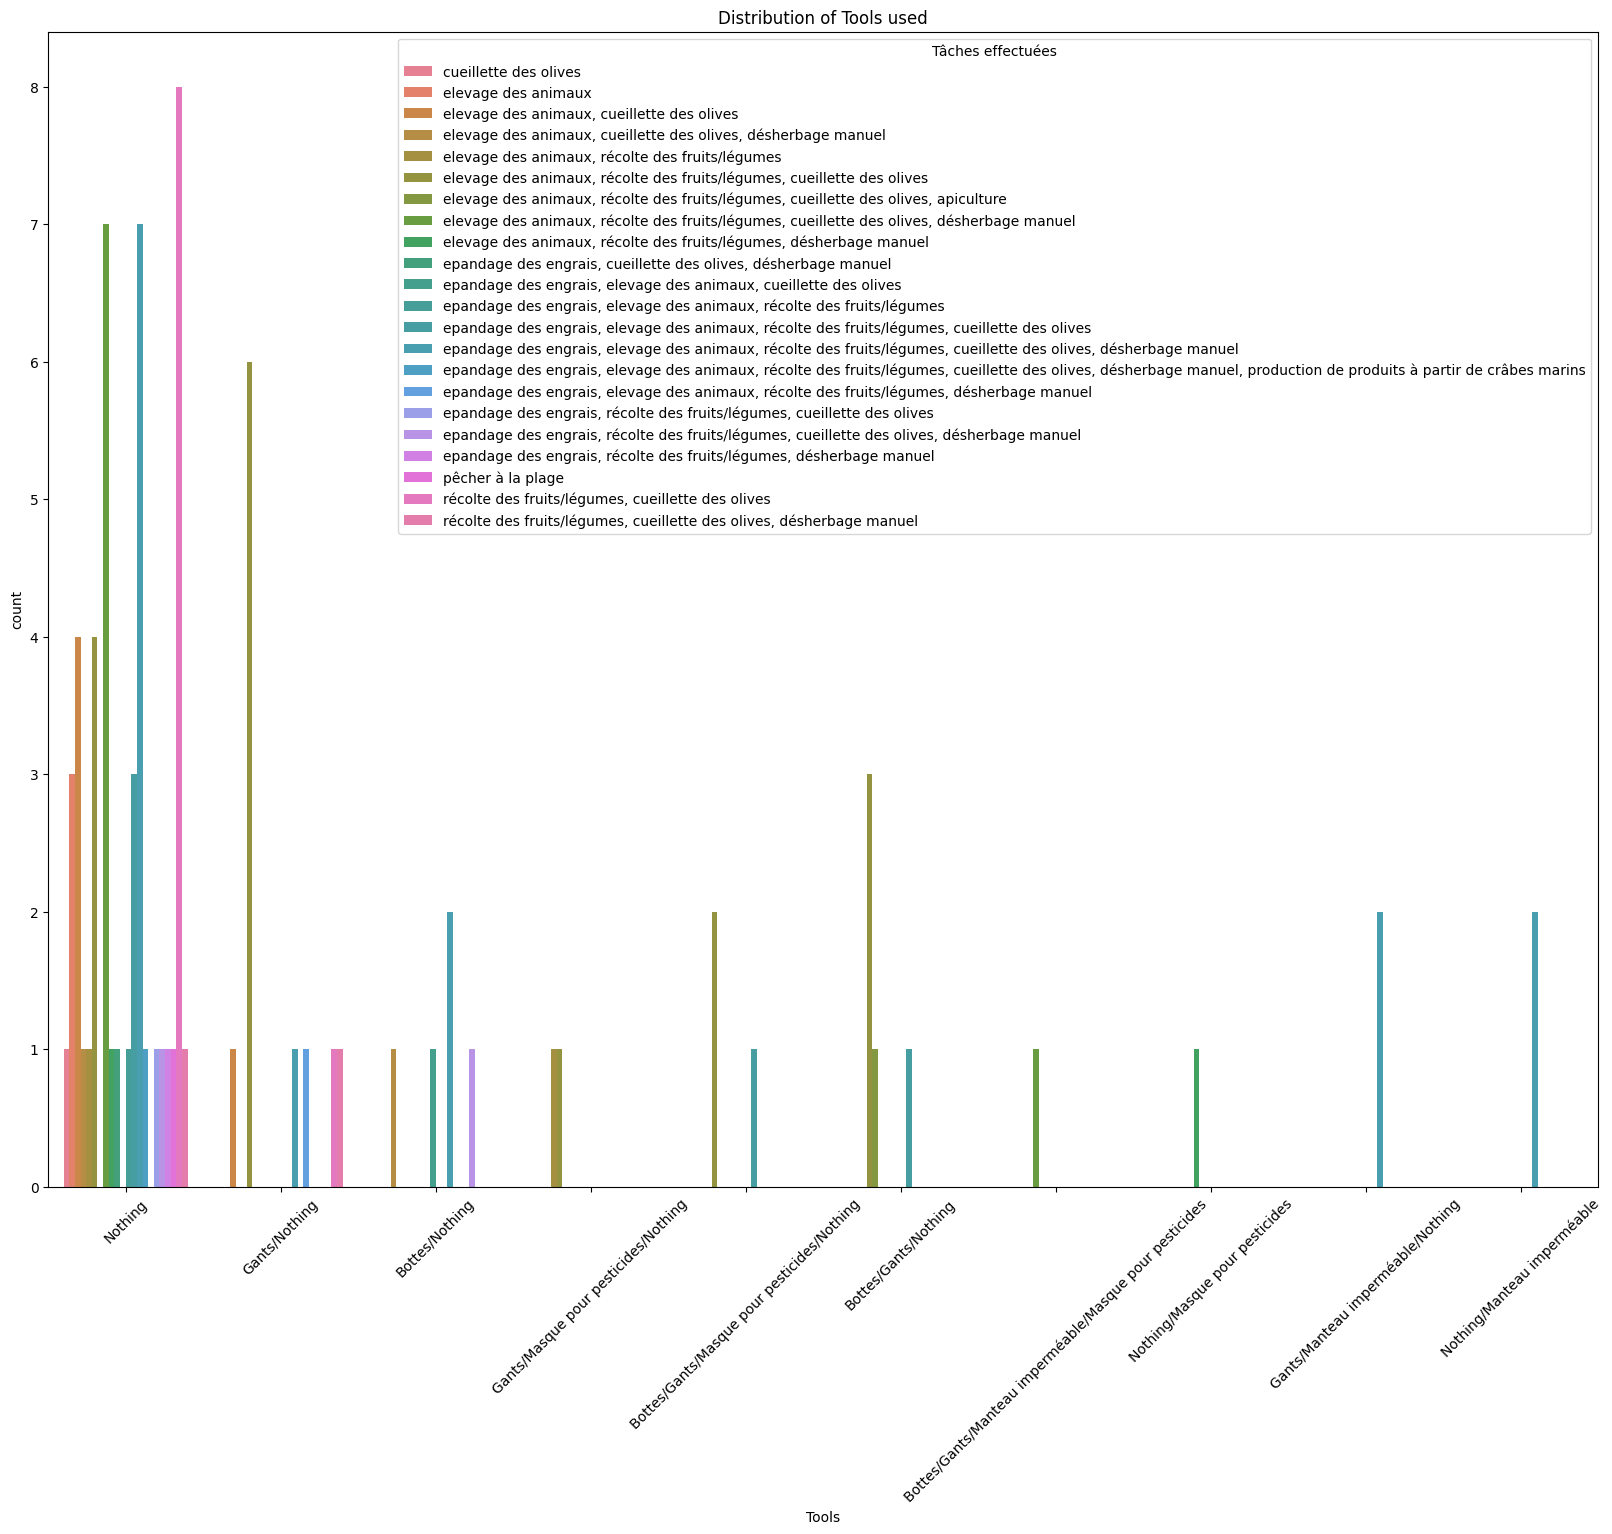

In [ ]:
#create a bar plot that set the Tâches effectuées as x and tools as y and the count the values
plt.figure(figsize=(20,15))
sns.barplot(x="Tools", y="count", hue="Tâches effectuées", data=result)
plt.xticks(rotation=45)
plt.title("Distribution of Tools used")
